<a href="https://colab.research.google.com/github/oakthyago/NLP_study_one/blob/main/NLP_Introduction_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Kaggle API to import the dataset saving drive space

In [ ]:
from google.colab import files
import os
import shutil

# Upload kaggle.json
uploaded = files.upload()

# Move kaggle.json to the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

# Verify setup
!kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           7321        158  1.0              
hanaksoy/health-and-sleep-statistics                             Health and sleep statistics                           1KB  2024-09-09 16:08:44           1366         22  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           4100         57  1.0              
haseebindata/student-

In [ ]:
# prompt: kaggle datasets download -d luisfredgs/imdb-ptbr and put on data =

!kaggle datasets download -d luisfredgs/imdb-ptbr
!unzip imdb-ptbr.zip



Dataset URL: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr
License(s): unknown
 85% 41.0M/48.4M [00:00<00:00, 48.0MB/s]
100% 48.4M/48.4M [00:00<00:00, 51.3MB/s]
Archive:  imdb-ptbr.zip
  inflating: imdb-reviews-pt-br.csv  


In [ ]:
import pandas as pd


# Load the dataset into the 'data' variable (assuming the file is a CSV, adjust the filename if necessary)
reviews = pd.read_csv('/content/imdb-reviews-pt-br.csv')



In [ ]:
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
reviews.sentiment.value_counts()

,count
sentiment,
neg,24765
pos,24694


In [ ]:
# prompt: reviews.sentiment to bololin value 0 neg 1 pos

reviews['bool_sentiment'] = reviews['sentiment'].apply(lambda x: 0 if x == 'neg' else 1)
reviews.bool_sentiment.value_counts()

,count
bool_sentiment,
0,24765
1,24694


In [ ]:
reviews.tail()

,id,text_en,text_pt,sentiment,bool_sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [ ]:
# prompt: from scikitlearn import test train split




# Bag of words and Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split



bag_of_words = CountVectorizer(lowercase=False, max_features=100).fit_transform(reviews['text_pt'])

X_train, X_test, y_train, y_test = train_test_split(
    bag_of_words,
    reviews['bool_sentiment'],
    test_size=0.2,
    random_state=42
)


In [ ]:
# prompt: bag_of_words SIZE

print(bag_of_words.shape)


(49459, 100)


In [ ]:
# prompt: Log_Reg = logistic regretion.fit( X_train, y_train

from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(max_iter=1000)
Log_Reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [ ]:
Log_Reg.score(X_test, y_test)

0.7019813991103923

In [ ]:
# prompt: make the function text_classification that will get  reviews, text_pt and bool_sentiment

def text_classification(reviews, text_pt, bool_sentiment,N_Features):
  """
  This function performs text classification on movie reviews.

  Args:
    reviews: A pandas DataFrame containing the movie reviews.
    text_pt: The column name containing the review text.
    bool_sentiment: The column name containing the sentiment labels (0 or 1).

  Returns:
    The accuracy score of the Logistic Regression model.
  """
  bag_of_words = CountVectorizer(lowercase=False, max_features=N_Features).fit_transform(reviews[text_pt])
  X_train, X_test, y_train, y_test = train_test_split(
      bag_of_words,
      reviews[bool_sentiment],
      test_size=0.2,
      random_state=42
  )
  Log_Reg = LogisticRegression(max_iter=1000)
  Log_Reg.fit(X_train, y_train)
  return Log_Reg.score(X_test, y_test)


In [ ]:
text_classification(reviews,'text_pt','bool_sentiment',100)

0.7019813991103923

In [ ]:
text_classification(reviews,'text_pt','bool_sentiment',1000)

In [ ]:
text_classification(reviews,'text_pt','bool_sentiment',5000)

0.8661544682571776

In [ ]:
!pip install wordcloud

In [ ]:
%matplotlib inline

from wordcloud import WordCloud

import matplotlib.pyplot as plt



# Cloud of words

In [ ]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

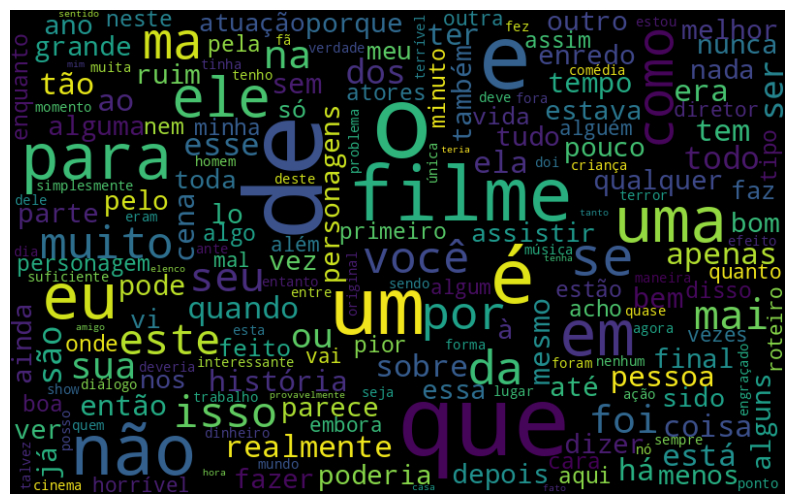

In [ ]:
nuvem_palavras_neg(reviews, 'text_pt')

In [ ]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

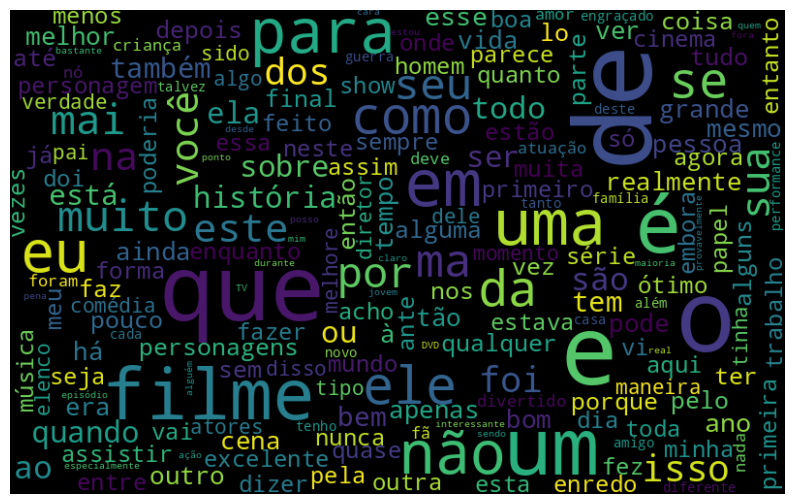

In [ ]:
nuvem_palavras_pos(reviews, "text_pt")

In [ ]:
import seaborn as sns
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt

nltk.download('punkt')

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(reviews, "text_pt", 10)

In [ ]:
nltk.download('stopwords')
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in reviews.text_pt:
    nova_frase = list()
    token_espaco = tokenize.WhitespaceTokenizer()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

reviews["tratamento_1"] = frase_processada

In [ ]:
nuvem_palavras_pos(reviews, "tratamento_1")

In [ ]:
text_classification(reviews,'tratamento_1','bool_sentiment',3000)

0.8617064294379296

In [ ]:
text_classification(reviews,'tratamento_1','bool_sentiment',100)

0.7122927618277396

In [ ]:
from string import punctuation
from nltk import tokenize


token_pontuacao = tokenize.WordPunctTokenizer()
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in reviews["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

reviews["tratamento_2"] = frase_processada

In [ ]:
reviews.head()

,id,text_en,text_pt,sentiment,bool_sentiment,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [ ]:
text_classification(reviews,'tratamento_2','bool_sentiment',100)

0.7088556409219572

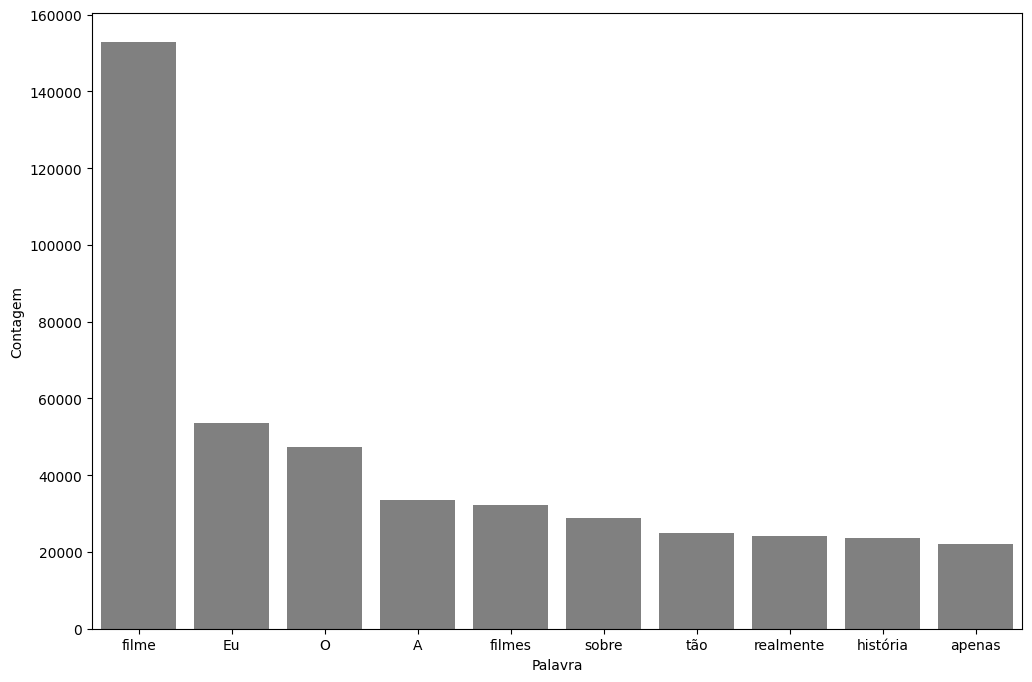

In [ ]:
pareto(reviews, "tratamento_2", 10)